In [21]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

# Read Stock Data

In [22]:
#Read the stock data
colnames=['Date', 'CompanyName', 'ClosingPrice', 'City','State','NAICS','LogDiff']
stockData = pd.read_csv("/data/WorkData/firmEmbeddings/StockData/stockData07to13_logdiff_5_0.1.csv",names=colnames, header=None)
print(len(stockData))

stockData.head(10)



1241788


,Date,CompanyName,ClosingPrice,City,State,NAICS,LogDiff
0,24/06/2008,AAR CORP,14.76,Wood Dale,IL,423860.0,-0.270565
1,14/03/2012,AAR CORP,22.00,Wood Dale,IL,423860.0,0.021011
2,13/06/2011,AAR CORP,25.10,Wood Dale,IL,423860.0,-0.551843
3,24/09/2007,AAR CORP,29.67,Wood Dale,IL,423860.0,-0.381545
4,05/09/2013,AAR CORP,25.63,Wood Dale,IL,423860.0,0.209296
5,23/10/2007,AAR CORP,32.22,Wood Dale,IL,423860.0,0.494777
6,16/11/2009,AAR CORP,20.36,Wood Dale,IL,423860.0,0.120958
7,28/12/2012,AAR CORP,18.09,Wood Dale,IL,423860.0,0.318570
8,16/02/2012,AAR CORP,22.71,Wood Dale,IL,423860.0,-0.455907
9,10/05/2010,AAR CORP,23.43,Wood Dale,IL,423860.0,0.019537


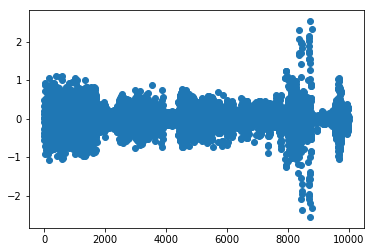

In [23]:
cc=stockData.head(10000)
x=range(len(cc))
plt.scatter(x,cc["LogDiff"])
plt.show()

In [24]:

stockData['Date'] = pd.to_datetime(stockData['Date'])

#Number of data points
print(len(stockData))


print(stockData.dtypes)
stockData.head(1)

1241788
Date            datetime64[ns]
CompanyName             object
ClosingPrice           float64
City                    object
State                   object
NAICS                  float64
LogDiff                float64
dtype: object


,Date,CompanyName,ClosingPrice,City,State,NAICS,LogDiff
0,2008-06-24,AAR CORP,14.76,Wood Dale,IL,423860.0,-0.270565


# Read Case data

In [25]:
#Read the train case data
caseDataFile_train = open("/data/WorkData/firmEmbeddings/CaseData/traindocvector.pkl","rb")
caseData_train = pickle.load(caseDataFile_train)

print(len(caseData_train))
caseData_train.head(2)

2888


,CaseId,Date,Vector,Year,Month,Category,Sub-Category
1089,X16G9CO003,3/19/07,"[-1.08903, -2.65365, 1.82479, -4.44473, 0.0766...",2007,3,7.0,Antitrust & Trade
1090,X17GUKO003,8/17/07,"[-2.37343, 2.65059, -2.7418, 0.73231, 0.254526...",2007,8,6.0,Labor Law


In [26]:
#Read the test case data
caseDataFile_test = open("/data/WorkData/firmEmbeddings/CaseData/testdocvector.pkl","rb")
caseData_test = pickle.load(caseDataFile_test)

print(len(caseData_test))
caseData_test.head(2)


477


,CaseId,Date,Vector,Year,Month,Category,Sub-Category
612,X1HT4F0N,5/21/13,"[-5.35576, -4.48995, -1.21671, -0.793479, 3.50...",2013,5,7.0,Consumer Law
613,X1JB7OQ003,2/28/13,"[-0.0768095, 1.46507, 1.03405, 2.45887, -1.756...",2013,2,6.0,Labor Law


In [27]:
#Read the validation case data
caseDataFile_val = open("/data/WorkData/firmEmbeddings/CaseData/validationdocvector.pkl","rb")
caseData_val = pickle.load(caseDataFile_val)

print(len(caseData_val))

caseData_val.head(2)

1178


,CaseId,Date,Vector,Year,Month,Category,Sub-Category
0,X1HND4A003,5/11/12,"[-0.62676, -6.11609, -0.269485, -5.1118, -2.90...",2012,5,7.0,Contracts
1,X1IRIC8003,11/5/12,"[-0.678548, -2.43954, -2.53863, -3.21261, 1.29...",2012,11,7.0,Damages & Remedies


In [28]:
#Make the date format of all the datasets same
caseData_train['Date'] =  pd.to_datetime(caseData_train['Date'])
caseData_test['Date'] =  pd.to_datetime(caseData_test['Date'])
caseData_val['Date'] =  pd.to_datetime(caseData_val['Date'])
caseData_train.head(1)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category
1089,X16G9CO003,2007-03-19,"[-1.08903, -2.65365, 1.82479, -4.44473, 0.0766...",2007,3,7.0,Antitrust & Trade


# Join Data on date

In [29]:
#Join stock and train case data
joined_train_data = pd.merge(caseData_train,stockData,how='inner',on='Date')


#Join stock and test case data
joined_test_data = pd.merge(caseData_test,stockData,how='inner',on='Date')

#joined_test_data = joined_train_data.head(1000)
joined_val_data = pd.merge(caseData_val,stockData,how='inner',on='Date')

In [30]:
print(len(joined_train_data))
print(len(joined_test_data))
len(joined_val_data)

1950769
263552


683810

In [31]:

joined_train_data.to_pickle('/data/WorkData/firmEmbeddings/JoinDataPrep/training_data_CaseCompanyStockChange.pkl')
#joined_train_data.to_cvs('/Users/Anshu/MLCS_Project/training_data_CaseCompanyStockChange.csv')

joined_test_data.to_pickle('/data/WorkData/firmEmbeddings/JoinDataPrep/testing_data_CaseCompanyStockChange.pkl')
joined_val_data.to_pickle('/data/WorkData/firmEmbeddings/JoinDataPrep/validation_data_CaseCompanyStockChange.pkl')

In [32]:
joined_val_data.head(1)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category,CompanyName,ClosingPrice,City,State,NAICS,LogDiff
0,X1HND4A003,2012-05-11,"[-0.62676, -6.11609, -0.269485, -5.1118, -2.90...",2012,5,7.0,Contracts,AAR CORP,14.95,Wood Dale,IL,423860.0,-0.263395
